## DCT via FFT

Reference: https://dsp.stackexchange.com/questions/2807/fast-cosine-transform-via-fft/10606

DCT Type-II is required for MFCCs. Since CMSIS-DSP does not support DCT Type-II, I develop a function based on RFFT to calculate DCT Type-II.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, dct
%matplotlib inline

N = 40  # The number of samples in a data frame
y = np.arange(80,80+40)  # Generate test data
y

array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119])

In [2]:
# Scipy's DCT
dcted = dct(y).astype(int)
dcted

array([7960, -648,    0,  -71,    0,  -25,    0,  -13,    0,   -7,    0,
         -5,    0,   -3,    0,   -2,    0,   -2,    0,   -1,    0,   -1,
          0,   -1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])

In [3]:
# DCT via RFFT
yy = np.zeros(2*N)
yy[:N] = y
yy[N:] = y[::-1]
k = np.arange(N)
Y = fft(yy)[:N]

In [4]:
# Validation
Y = Y * (np.cos(-1*np.pi*k/(2*N)) + 1j * np.sin(-1*np.pi*k/(2*N)))
Y = Y.real
DCTED = Y.astype(int)
y, yy, DCTED, DCTED == dcted

(array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119]),
 array([ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
         91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
        102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
        113., 114., 115., 116., 117., 118., 119., 119., 118., 117., 116.,
        115., 114., 113., 112., 111., 110., 109., 108., 107., 106., 105.,
        104., 103., 102., 101., 100.,  99.,  98.,  97.,  96.,  95.,  94.,
         93.,  92.,  91.,  90.,  89.,  88.,  87.,  86.,  85.,  84.,  83.,
         82.,  81.,  80.]),
 array([7960, -648,    0,  -71,    0,  -25,    0,  -13,    0,   -7,    0,
          -5,    0,   -3,    0,   -2,    0,   -2,    0,   -1,    0,   -1,
           0,   -1,    0,    0,    0,    0,    0,    0,    0,    0,    0

## Mel scale

log10 is required for Mel filter banks, but log10 function supported by the standard "math.h" takes time too much.

log10 approximation is much faster than the standard log10 function, so I will use it for Mel filter banks.

In [5]:
f = np.linspace(0, 22000, N)

In [ ]:
logten2 = np.log10(2)
import math

c = [1.23149591368684, -4.11852516267426, 6.02197014179219, -3.13396450166353]
def log10_approx(x):
    f, e = math.frexp(x)
    return logten2 * (c[0]*f**3 + c[1]*f**2 + c[2]*f + c[3] + e)

log10_approx_ = np.vectorize(log10_approx)

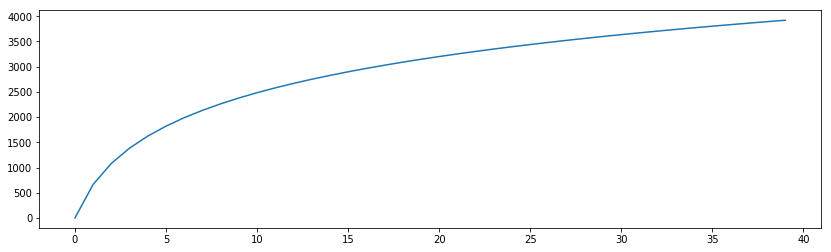

In [10]:
# Standard log10 function
plt.figure(figsize=[14,4])
plt.plot(2595 * np.log10(1 + f/700))

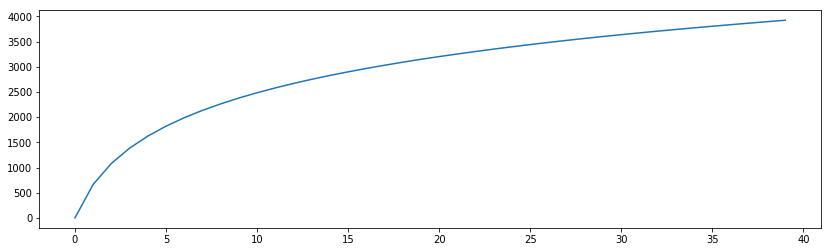

In [11]:
# log10 approximation
plt.figure(figsize=[14,4])
plt.plot(2595 * log10_approx_(1 + f/700))

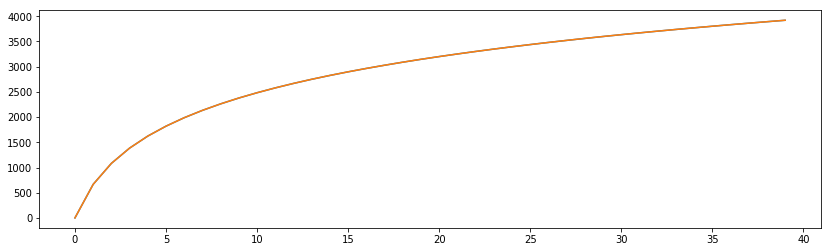

In [13]:
# Validation
# Both curves are identical
plt.figure(figsize=[14,4])
plt.plot(2595 * np.log10(1 + f/700))
plt.plot(2595 * log10_approx_(1 + f/700))